In [59]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
if not Path("img").exists():
    Path("img").mkdir()
    print("Created img directory")

# Strong and Weak Scaling

In [61]:
strong_scaling_df = pd.read_csv('csv/strong_scaling.csv')
weak_scaling_df = pd.read_csv('csv/weak_scaling.csv')

In [62]:
strong_scaling_df['Average wct'] = strong_scaling_df.drop(columns=['p']).mean(axis=1)
weak_scaling_df['Average wct'] = weak_scaling_df.drop(columns=['p']).mean(axis=1)

In [63]:
strong_scaling_df['speedup'] = strong_scaling_df['Average wct'][0] / strong_scaling_df['Average wct']

In [64]:
strong_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,speedup
0,1,12.941009,12.846122,13.279885,13.124807,13.101260,13.058617,1.000000
1,2,6.531103,6.709235,6.821394,6.989430,6.562823,6.722797,1.942438
2,3,4.477018,4.637547,4.416162,4.471832,4.424010,4.485314,2.911416
3,4,3.386704,3.344937,3.566760,3.320402,3.289742,3.381709,3.861544
4,5,2.720429,2.768941,2.694452,2.661266,2.683466,2.705711,4.826316


In [65]:
strong_scaling_df['efficiency'] = strong_scaling_df['speedup'] / strong_scaling_df['p']

weak_scaling_df['efficiency'] = weak_scaling_df['Average wct'][0] / weak_scaling_df['Average wct']

In [66]:
strong_scaling_df.head(8)

,p,t1,t2,t3,t4,t5,Average wct,speedup,efficiency
0,1,12.941009,12.846122,13.279885,13.124807,13.101260,13.058617,1.000000,1.000000
1,2,6.531103,6.709235,6.821394,6.989430,6.562823,6.722797,1.942438,0.971219
2,3,4.477018,4.637547,4.416162,4.471832,4.424010,4.485314,2.911416,0.970472
3,4,3.386704,3.344937,3.566760,3.320402,3.289742,3.381709,3.861544,0.965386
4,5,2.720429,2.768941,2.694452,2.661266,2.683466,2.705711,4.826316,0.965263
5,6,2.321588,2.291439,2.249243,2.326216,2.351815,2.308060,5.657832,0.942972
6,7,2.068506,2.021430,1.966057,2.002504,2.171299,2.045959,6.382638,0.911805
7,8,1.785145,1.785186,1.725450,1.812531,1.787732,1.779209,7.339564,0.917445


In [67]:
weak_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,efficiency
0,1,13.097689,12.951720,13.160213,13.033412,13.031697,13.054946,1.000000
1,2,13.224467,13.850342,13.182265,13.127808,13.799785,13.436933,0.971572
2,3,13.619565,13.155775,13.421213,13.932746,14.130938,13.652047,0.956263
3,4,14.249534,14.142579,14.713179,14.518229,14.137901,14.352284,0.909608
4,5,13.687275,13.737280,14.177047,13.916366,14.154113,13.934416,0.936885


Plot the speedup with the theoretical linear speedup as a reference.

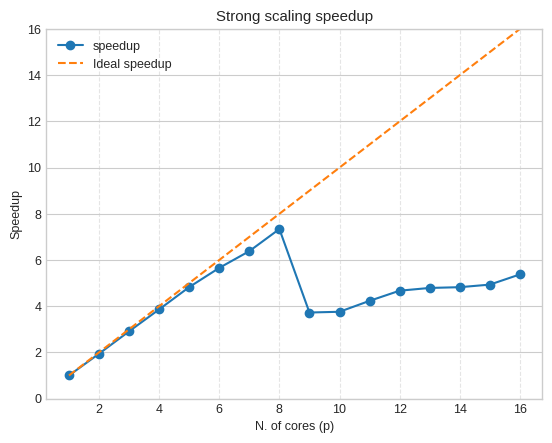

In [68]:
strong_scaling_df.plot(x='p', y='speedup', title='Strong scaling speedup', marker='o', ylim=(0, max(strong_scaling_df['p'])))
plt.plot(strong_scaling_df['p'], strong_scaling_df['p'], label='Ideal speedup', linestyle='--')
plt.xlabel('N. of cores (p)')
plt.ylabel('Speedup')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig(f'img{os.sep}strong_scaling_speedup.svg', format='svg')
plt.show()

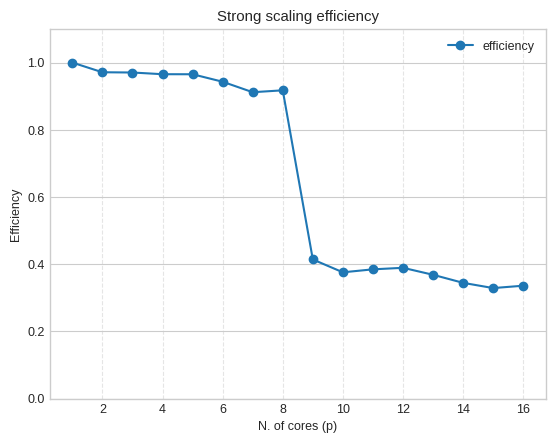

In [69]:
strong_scaling_df.plot(x='p', y='efficiency', title='Strong scaling efficiency', marker='o', ylim=(0, 1.1))
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig(f'img{os.sep}strong_scaling_efficiency.svg', format='svg')
plt.show()

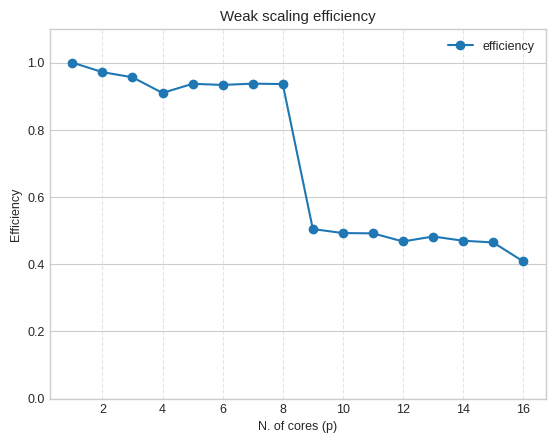

In [70]:
weak_scaling_df.plot(x='p', y='efficiency', title='Weak scaling efficiency', marker='o', ylim=(0, 1.1))
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig(f'img{os.sep}weak_scaling_efficiency.svg', format='svg')
plt.show()

# CUDA Throughput

In [71]:
def process_cuda_df(K: int) -> pd.DataFrame:
    df = pd.read_csv(f'csv/cuda_perf{K}.csv')

    df['CPU Average wct'] = df[['cpu_t1','cpu_t2','cpu_t3','cpu_t4','cpu_t5']].mean(axis=1)
    df['GPU Average wct'] = df[['gpu_t1','gpu_t2','gpu_t3','gpu_t4','gpu_t5']].mean(axis=1)
    df['GPU Average wct shared'] = df[['gpu_t1_shared','gpu_t2_shared','gpu_t3_shared','gpu_t4_shared','gpu_t5_shared']].mean(axis=1)

    df['CPU Average throughput'] = df[['cpu_th1','cpu_th2','cpu_th3','cpu_th4','cpu_th5']].mean(axis=1) / 1000000
    df['GPU Average throughput'] = df[['gpu_th1','gpu_th2','gpu_th3','gpu_th4','gpu_th5']].mean(axis=1) / 1000000
    df['GPU Average throughput shared'] = df[['gpu_th1_shared','gpu_th2_shared','gpu_th3_shared','gpu_th4_shared','gpu_th5_shared']].mean(axis=1) / 1000000

    df['Speedup'] = df['CPU Average wct'] / df['GPU Average wct']
    df['Speedup shared'] = df['CPU Average wct'] / df['GPU Average wct shared']
    return df

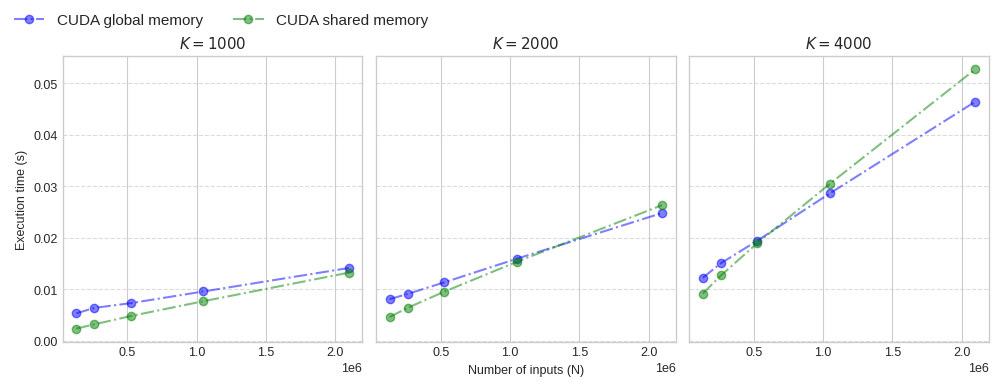

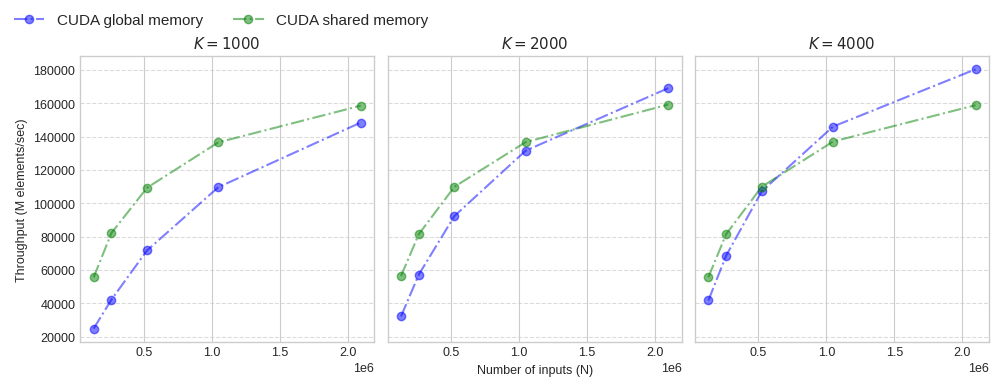

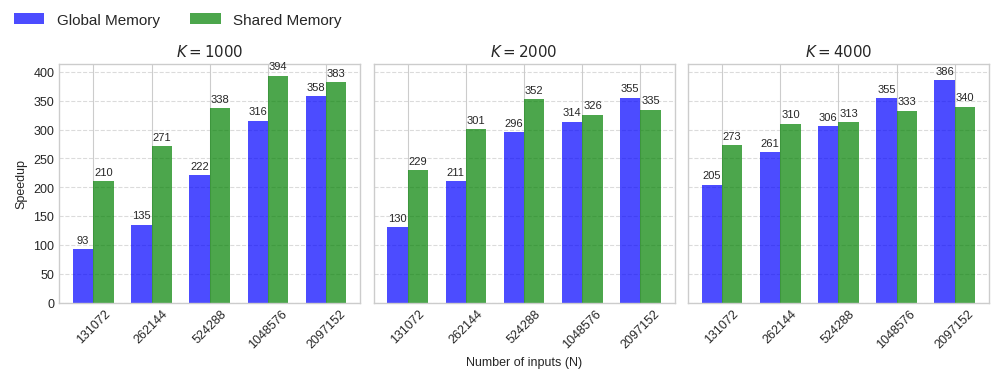

--- Speedup Summary for N = 1048576 ---
K = 1000:
  Speedup (Global vs OpenMP): 315.74
  Speedup (Shared vs OpenMP): 393.64
K = 2000:
  Speedup (Global vs OpenMP): 313.86
  Speedup (Shared vs OpenMP): 326.19
K = 4000:
  Speedup (Global vs OpenMP): 354.97
  Speedup (Shared vs OpenMP): 333.18


In [72]:
K_values = [1000, 2000, 4000]
cuda_data = {k: process_cuda_df(K=k) for k in K_values}
figsize = (10, 4)

# Set aesthetic style
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#3498db', '#2ecc71']  # Blue, Green
plt.rcParams.update({'font.size': 9})

# --- Plotting Wall Clock Times ---
fig_wct, axes_wct = plt.subplots(1, len(K_values), figsize=figsize, sharey=True)

for idx, k in enumerate(K_values):
    df = cuda_data[k]
    ax = axes_wct[idx]
    ax.plot(df['N'], df['GPU Average wct'], label='CUDA global memory', marker='o', linestyle='-.', color='blue', alpha=0.5)
    ax.plot(df['N'], df['GPU Average wct shared'], label='CUDA shared memory', marker='o', linestyle='-.', color='green', alpha=0.5)
    ax.set_title(rf'$K = {k}$')
    if idx == 0:
        ax.set_ylabel('Execution time (s)')
    elif idx == 1:
        ax.set_xlabel('Number of inputs (N)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a shared legend at the top of the figure
handles, labels = axes_wct[0].get_legend_handles_labels()
fig_wct.legend(handles, labels, loc=2, ncol=2, fontsize=11)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.savefig(f'img{os.sep}cuda_wct_comparison.svg', format='svg', bbox_inches='tight', dpi=300)
plt.savefig(f'img{os.sep}cuda_wct_comparison.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

# --- Plotting Throughput ---
fig_th, axes_th = plt.subplots(1, len(K_values), figsize=figsize, sharey=True)

for idx, k in enumerate(K_values):
    df = cuda_data[k]
    ax = axes_th[idx]
    #ax.plot(df['N'], df['CPU Average throughput'], label='OpenMP', marker='o', linestyle='-.', color='orange', alpha=0.5)
    ax.plot(df['N'], df['GPU Average throughput'], label='CUDA global memory', marker='o', linestyle='-.', color='blue', alpha=0.5)
    ax.plot(df['N'], df['GPU Average throughput shared'], label='CUDA shared memory', marker='o', linestyle='-.', color='green', alpha=0.5)
    ax.set_title(rf'$K = {k}$')
    if idx == 0:
        ax.set_ylabel('Throughput (M elements/sec)')
    elif idx == 1:
        ax.set_xlabel('Number of inputs (N)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a shared legend at the top of the figure
handles, labels = axes_th[0].get_legend_handles_labels()
fig_th.legend(handles, labels, loc=2, ncol=2, fontsize=11)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'img{os.sep}cuda_throughput_comparison.svg', format='svg', bbox_inches='tight', dpi=300)
plt.savefig(f'img{os.sep}cuda_throughput_comparison.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

# --- Merged Plotting Speedup (Global and Shared vs OpenMP) ---
fig_sp, axes_sp = plt.subplots(1, len(K_values), figsize=figsize, sharey=True)

for idx, k in enumerate(K_values):
    df = cuda_data[k]
    ax = axes_sp[idx]
    
    # Use bar chart with width offset to show global and shared side by side
    x = np.arange(len(df['N']))
    width = 0.35
    
    # Plot bars side by side with different colors
    global_bars = ax.bar(x - width/2, df['Speedup'], width, label='Global Memory', color='blue', alpha=0.7)
    shared_bars = ax.bar(x + width/2, df['Speedup shared'], width, label='Shared Memory', color='green', alpha=0.7)
    
    # Set x-ticks to show the N values
    ax.set_xticks(x)
    ax.set_xticklabels(df['N'], rotation=45)
    ax.set_title(rf'$K = {k}$')
    
    if idx == 0:
        ax.set_ylabel('Speedup')
    elif idx == 1:
        ax.set_xlabel('Number of inputs (N)')
    
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate bars with values for better readability
    for bar in global_bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    
    for bar in shared_bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Add a shared legend at the top of the figure
handles, labels = axes_sp[0].get_legend_handles_labels()
fig_sp.legend(handles, labels, loc=2, ncol=2, fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])  # Adjust layout to make room for suptitle and x-label
plt.savefig(f'img{os.sep}cuda_speedup_comparison.svg', format='svg', bbox_inches='tight', dpi=300)
plt.savefig(f'img{os.sep}cuda_speedup_comparison.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

# --- Speedup Summary ---
N_val = 2**20 # Example N value for summary
print(f"--- Speedup Summary for N = {N_val} ---")
for k in K_values:
    df = cuda_data[k]
    if N_val in df['N'].values:
        speedup_global = df[df['N'] == N_val]['Speedup'].values[0]
        speedup_shared = df[df['N'] == N_val]['Speedup shared'].values[0]
        print(f"K = {k}:")
        print(f"  Speedup (Global vs OpenMP): {speedup_global:.2f}")
        print(f"  Speedup (Shared vs OpenMP): {speedup_shared:.2f}")
    else:
        print(f"K = {k}: Data for N = {N_val} not found.")